In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

from scipy import stats

In [2]:
# identify and change directory
new_dir = 'Z:/Desktop/AS_Matlab/';
os.chdir(new_dir)

In [3]:
# read fluxes file with gaps
FCO2_30m = pd.read_pickle('flux_data_kuivajarvi.pkl', compression='infer', storage_options=None)
# resample to daily
FCO2_1d = FCO2_30m.resample('1d').mean()
# FCO2_1d = FCO2_1d*3600*24*44/1000000 # CO2
FCO2_1d = FCO2_1d*3600*24*12/1000000 # CARBON
print(FCO2_1d)
# print(FCO2_30m['KVJ_EDDY.F_CO2_LI72'])

            KVJ_EDDY.LE_LI75  KVJ_EDDY.LE_LI72  KVJ_EDDY.F_CO2_LI75  \
timestamp                                                             
2012-01-01               NaN               NaN                  NaN   
2012-01-02               NaN               NaN                  NaN   
2012-01-03               NaN               NaN                  NaN   
2012-01-04               NaN               NaN                  NaN   
2012-01-05               NaN               NaN                  NaN   
...                      ...               ...                  ...   
2024-10-04               NaN          8.100634                  NaN   
2024-10-05               NaN          9.377810                  NaN   
2024-10-06               NaN          4.561941                  NaN   
2024-10-07               NaN         17.594148                  NaN   
2024-10-08               NaN         21.774723                  NaN   

            KVJ_EDDY.F_CO2_PICA  KVJ_EDDY.F_CO2_LI72  KVJ_EDDY.MO_length  \


In [4]:
# read datatframe fluxes no gaps
FCO2_filled = pd.read_csv('ECFluxes_da.csv',sep=';')
# create dataframe from file
dataframe = pd.DataFrame(FCO2_filled)
# convert time from series to datetime
FCO2_filled['Time'] = pd.to_datetime(FCO2_filled['Time'])
# FCO2_filled['FCO2'] = FCO2_filled['FCO2']*3600*24*44/1000000 # CO2
FCO2_filled['FCO2'] = FCO2_filled['FCO2']*3600*24*12/1000000 # CARBON
print(FCO2_filled.columns)

Index(['Time', 'FCO2', 'FCH4 (nmol m-2 s-1)', 'LE (W m-2)', 'H (W m-2)',
       'NEE Forest (umol m-2 s-1)'],
      dtype='object')


In [5]:
# read turnover dates
turnover_periods = pd.read_csv('Turnover_dates.csv',sep=';',names=["Year","Month","Day","Hour","Minute"],na_values=['','','NaN'])
turnover_periods['datetime'] = pd.to_datetime(turnover_periods[['Year','Month','Day','Hour','Minute']])
turnover_periods = turnover_periods[['datetime']]
# print(FCO2_filled.columns)

C:\Hyapp\Anaconda3-2023.07-2\Lib\site-packages\pandas\core\arrays\timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
C:\Hyapp\Anaconda3-2023.07-2\Lib\site-packages\pandas\core\arrays\timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


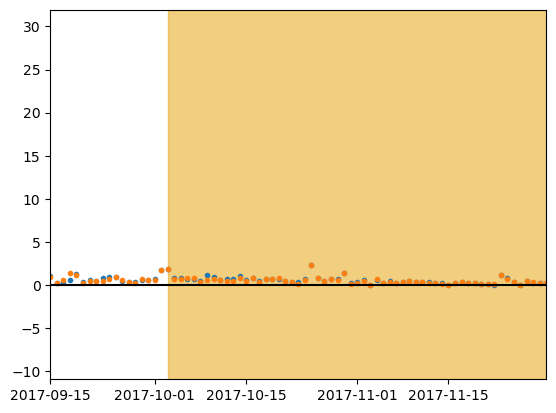

In [6]:
# plot timeseries
plt.plot(FCO2_filled.Time,FCO2_filled.FCO2,'.')
plt.plot(FCO2_1d.index,FCO2_1d['KVJ_EDDY.F_CO2_LI72'],'.')
# plot horizontal line
plt.axhline(y=0, color='k')
# plt.show()
colors = ["#e69f00","#009e73"]
plt.xlim([datetime(2017,9,15), datetime(2017,11,30)]) 

for i in range(0,len(turnover_periods),2):
    start_period = turnover_periods['datetime'].iloc[i]
    end_period = turnover_periods['datetime'].iloc[i+1]
    if pd.notna(start_period):
        plt.axvspan(start_period, end_period, color=colors[int(np.floor(i%4)/2)],alpha=0.5)

In [7]:
df_overturn_FCO2 = pd.DataFrame()
df_overturn_time = pd.DataFrame()

for i in range(0,len(turnover_periods),2):
    start_period = turnover_periods['datetime'].iloc[i]
    end_period = turnover_periods['datetime'].iloc[i+1]
    if pd.notna(start_period):
        overturn_FCO2 = FCO2_filled[(FCO2_filled['Time'] >= start_period) & (FCO2_filled['Time'] <= end_period)]['FCO2']
        overturn_FCO2_df = overturn_FCO2.reset_index(drop=True).to_frame()
        df_overturn_FCO2 = pd.concat([df_overturn_FCO2, overturn_FCO2_df], ignore_index=True)

        overturn_time = FCO2_filled[(FCO2_filled['Time'] >= start_period) & (FCO2_filled['Time'] <= end_period)]['Time']
        overturn_time_df = overturn_time.reset_index(drop=True).to_frame()
        df_overturn_time = pd.concat([df_overturn_time, overturn_time_df], ignore_index=True)
# print(df_overturn_FCO2)

In [8]:
df_overturn_FCO2_gaps = pd.DataFrame()

for i in range(0,len(turnover_periods),2):
    start_period = turnover_periods['datetime'].iloc[i]
    end_period = turnover_periods['datetime'].iloc[i+1]
    if pd.notna(start_period):
        overturn_FCO2_gaps = FCO2_1d[(FCO2_1d.index >= start_period) & (FCO2_1d.index <= end_period)]['KVJ_EDDY.F_CO2_LI72']
        overturn_FCO2_df_gaps = overturn_FCO2_gaps.reset_index(drop=True).to_frame()
        df_overturn_FCO2_gaps = pd.concat([df_overturn_FCO2_gaps, overturn_FCO2_df_gaps], ignore_index=True)

Index(['Time', 'FCO2', 'FCH4 (nmol m-2 s-1)', 'LE (W m-2)', 'H (W m-2)',
       'NEE Forest (umol m-2 s-1)'],
      dtype='object')


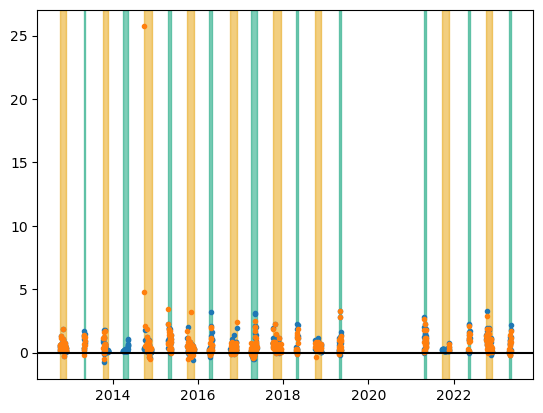

In [9]:
# plot timeseries
plt.plot(df_overturn_time,df_overturn_FCO2,'.')
plt.plot(df_overturn_time,df_overturn_FCO2_gaps,'.')
# plot horizontal line
plt.axhline(y=0, color='k')

for i in range(0,len(turnover_periods),2):
    start_period = turnover_periods['datetime'].iloc[i]
    end_period = turnover_periods['datetime'].iloc[i+1]
    if pd.notna(start_period):
        plt.axvspan(start_period, end_period, color=colors[int(np.floor(i%4)/2)],alpha=0.5)
        
print(FCO2_filled.columns)

In [10]:
print(FCO2_filled.columns)

Index(['Time', 'FCO2', 'FCH4 (nmol m-2 s-1)', 'LE (W m-2)', 'H (W m-2)',
       'NEE Forest (umol m-2 s-1)'],
      dtype='object')


In [11]:
FCO2_filled['Time'] = pd.to_datetime(FCO2_filled['Time'])
FCO2_filled.set_index('Time', inplace=True)
annual_sum_FCO2 = FCO2_filled.resample('Y').sum()
print(annual_sum_FCO2)
# print(FCO2_filled.columns)

                  FCO2  FCH4 (nmol m-2 s-1)    LE (W m-2)    H (W m-2)  \
Time                                                                     
2010-12-31   59.075783             0.000000   4084.190340  2762.761668   
2011-12-31  127.776470             0.000000   5930.790619  2744.949893   
2012-12-31   86.297912            30.802959   1773.911803  1074.122436   
2013-12-31   84.690616           138.586340   7819.219215  2097.349584   
2014-12-31   77.523923           151.264294   6776.555423  2462.577837   
2015-12-31  135.445861           145.781203  11399.112471  2604.576153   
2016-12-31  128.038801             0.000000   8675.703664  2972.466047   
2017-12-31  177.431577             0.000000  11404.627007  2926.057142   
2018-12-31  261.451584             0.000000  12208.804089  2107.664378   
2019-12-31  191.284986             0.000000   9831.473736  2820.302973   
2020-12-31  131.567608             0.000000   9350.995385  3004.173082   
2021-12-31  156.788442             0.0

In [12]:
# fluxes during SPRING periods
# FCO2_filled.set_index('Time', inplace=True)

spring_periods = {
    2010: (None,None),
    2011: (None,None),
    2012: (None,None),
    2013: ('2013-04-27', '2013-05-07'),
    2014: ('2014-03-26', '2014-05-15'),
    2015: ('2015-04-20', '2015-05-17'),
    2016: ('2016-04-07', '2016-05-01'),
    2017: ('2017-03-29', '2017-05-18'),
    2018: ('2018-04-23', '2018-05-06'),
    2019: ('2019-04-23', '2019-05-11'),
    2020: (None,None),
    2021: ('2021-04-20', '2021-05-11'),
    2022: ('2022-05-07', '2022-05-18'),
    2023: ('2023-04-21', '2023-05-06'),
}

annual_spring_FCO2 = {}
for year, (start, end) in spring_periods.items():
    if start is not None and end is not None:  # Check for valid start and end dates
        # Convert to datetime if they are strings
        start_date = pd.to_datetime(start)
        end_date = pd.to_datetime(end)
        
        # Filter the DataFrame for the spring period
        spring_data = FCO2_filled.loc[start_date:end_date]
        
        # Calculate the sum for that period
        annual_spring_FCO2[year] = spring_data['FCO2'].sum()
    else:
        # Set the sum to None for years with no valid dates
        annual_spring_FCO2[year] = None
        
annual_spring_df = pd.DataFrame(list(annual_spring_FCO2.items()), columns=['Year', 'Spring Sum'])
annual_spring_FCO2 = pd.Series(annual_spring_FCO2)
# annual_spring_df = annual_spring_FCO2.copy()


In [13]:
# spring_dates_array = np.array(['2012-01-01','2013-01-01','2014-01-01','2015-01-01','2016-01-01','2017-01-01','2018-01-01','2019-01-01','2020-01-01','2021-01-01','2022-01-01','2023-01-01','2024-01-01'])
# spring_dates_series = pd.Series(spring_dates_array)
# df_spring_annual = annual_spring_FCO2.reset_index()
# df_spring_annual.columns = ['Year', 'Spring_Sum']
# df_spring_annual['Spring_Date'] = spring_dates_series
# df_spring_annual['Spring_Date'] = pd.to_datetime(df_spring_annual['Spring_Date'])
# df_spring_annual = pd.concat([spring_dates_series, annual_spring_df], ignore_index=True)
annual_spring_FCO2.columns = ['Year', 'Spring_Sum'] 
print(annual_spring_FCO2)

2010          NaN
2011          NaN
2012          NaN
2013     9.310756
2014     9.713718
2015    26.732577
2016    14.276905
2017    20.597737
2018    11.298689
2019    18.130438
2020          NaN
2021    24.282163
2022    13.545367
2023    10.654553
dtype: float64


In [14]:
annual_sum_FCO2 = annual_sum_FCO2.reset_index()
annual_sum_FCO2.columns = ['Time', 'FCO2','FCH4','LE','H','NEE']

In [15]:
# fluxes during AUTUMN periods
# FCO2_filled.set_index('Time', inplace=True)

autumn_periods = {
    2010: (None,None),
    2011: (None,None),
    2012: ('2012-10-06', '2012-11-27'),
    2013: ('2013-10-12', '2013-11-24'),
    2014: ('2014-09-27', '2014-11-29'),
    2015: ('2015-10-03', '2015-11-27'),
    2016: ('2016-10-06', '2016-11-27'),
    2017: ('2017-10-03', '2017-12-13'),
    2018: ('2018-10-03', '2018-11-24'),
    2019: (None,None),
    2020: (None,None),
    2021: ('2021-09-24', '2021-11-22'),
    2022: ('2022-10-07', '2022-11-22'),
    2023: (None,None),
}

annual_autumn_FCO2 = {}
for year, (start, end) in autumn_periods.items():
    if start is not None and end is not None:  # Check for valid start and end dates
        # Convert to datetime if they are strings
        start_date = pd.to_datetime(start)
        end_date = pd.to_datetime(end)
        # Filter the DataFrame for the spring period
        autumn_data = FCO2_filled.loc[start_date:end_date]
        # Calculate the sum for that period
        annual_autumn_FCO2[year] = autumn_data['FCO2'].sum()
    else:
        # Set the sum to None for years with no valid dates
        annual_autumn_FCO2[year] = None
        
annual_autumn_df = pd.DataFrame(list(annual_autumn_FCO2.items()), columns=['Year', 'Spring Sum'])
annual_autumn_FCO2 = pd.Series(annual_autumn_FCO2)

# create dataframe for autumn turnover data
# df_autumn_annual = annual_autumn_FCO2.reset_index()
# df_autumn_annual.columns = ['Year', 'Autumn_Sum']
# df_autumn_annual['Spring_Date'] = spring_dates_series
# df_autumn_annual['Spring_Date'] = pd.to_datetime(df_autumn_annual['Spring_Date'])

print(annual_autumn_FCO2)

2010          NaN
2011          NaN
2012    24.705954
2013    14.413574
2014    18.054618
2015    19.020082
2016    20.853866
2017    32.126371
2018    22.075452
2019          NaN
2020          NaN
2021    13.039619
2022    35.723189
2023          NaN
dtype: float64


In [16]:
years_array = np.array(['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023'])
FCO2_years_array = np.array(['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023'])

spring_years_array = np.array(['2013','2014','2015','2016','2017','2018','2019','2021','2022','2023'])
autumn_years_array = np.array(['2012','2013','2014','2015','2016','2017','2018','2021','2022'])
annual_spring_df = annual_spring_FCO2.reset_index()
annual_spring_df.columns = ['Year', 'Spring Sum']

annual_autumn_df = annual_autumn_FCO2.reset_index()
annual_autumn_df.columns = ['Year', 'Autumn Sum']
# print(annual_spring_df)
# print(annual_autumn_df)

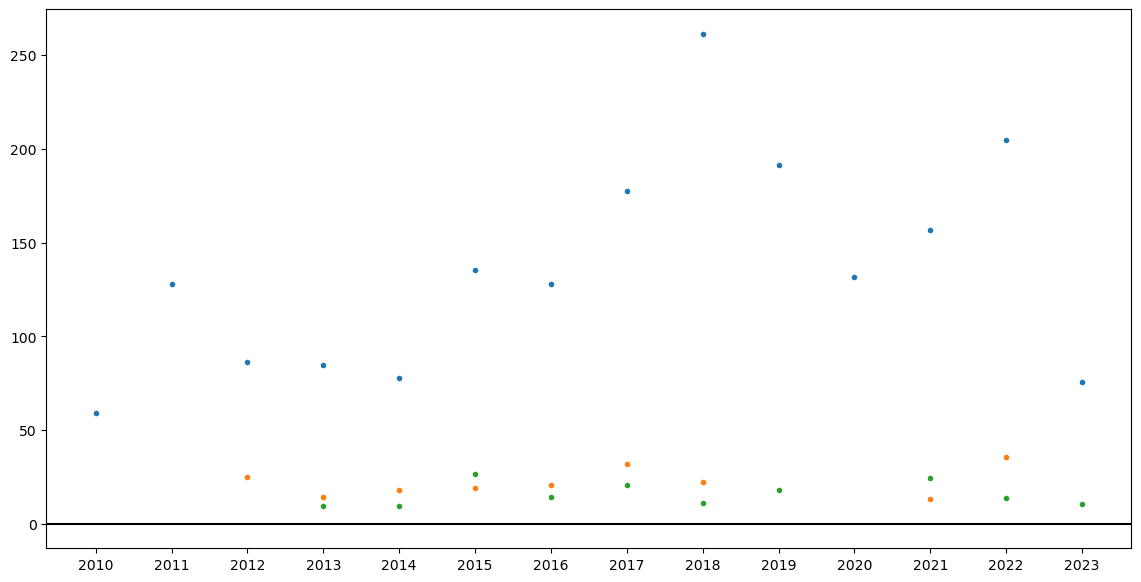

In [17]:
# plot timeseries
fig = plt.subplots(figsize=(14,7))
plt.plot(FCO2_years_array,annual_sum_FCO2['FCO2'],'.')
plt.axhline(y=0, color='k')
plt.plot(years_array, annual_autumn_df['Autumn Sum'],'.')
plt.plot(years_array, annual_spring_df['Spring Sum'],'.')

In [18]:
df_barplot = pd.DataFrame({
    'Total FCO2': annual_sum_FCO2['FCO2'],
    'Spring Sum': annual_spring_df['Spring Sum'],
    'Autumn Sum': annual_autumn_df['Autumn Sum']
})

per_FCO2_autumn = df_barplot['Autumn Sum']*100/df_barplot['Total FCO2']
per_FCO2_spring = df_barplot['Spring Sum']*100/df_barplot['Total FCO2']

df_per = pd.DataFrame(per_FCO2_autumn)
df_per['spring'] = per_FCO2_spring

other = df_barplot['Total FCO2']-(df_barplot['Spring Sum'].fillna(0)+df_barplot['Autumn Sum'].fillna(0))

df_barplot = pd.DataFrame({
    'Real Total FCO2': annual_sum_FCO2['FCO2'],
    'Spring FCO2': annual_spring_df['Spring Sum'],
    'Autumn FCO2': annual_autumn_df['Autumn Sum'],
    'Total FCO2' : other
})
print(df_per)
print(df_barplot)

            0     spring
0         NaN        NaN
1         NaN        NaN
2   28.628681        NaN
3   17.019093  10.993846
4   23.289092  12.529962
5   14.042572  19.736725
6   16.287145  11.150452
7   18.106344  11.608834
8    8.443419   4.321523
9         NaN   9.478233
10        NaN        NaN
11   8.316696  15.487215
12  17.444792   6.614642
13        NaN  14.109355
    Real Total FCO2  Spring FCO2  Autumn FCO2  Total FCO2
0         59.075783          NaN          NaN   59.075783
1        127.776470          NaN          NaN  127.776470
2         86.297912          NaN    24.705954   61.591959
3         84.690616     9.310756    14.413574   60.966286
4         77.523923     9.713718    18.054618   49.755588
5        135.445861    26.732577    19.020082   89.693202
6        128.038801    14.276905    20.853866   92.908030
7        177.431577    20.597737    32.126371  124.707469
8        261.451584    11.298689    22.075452  228.077442
9        191.284986    18.130438          NaN

In [19]:
column_mean = df_barplot.mean()
print(column_mean)

Real Total FCO2    135.547586
Spring FCO2         15.854290
Autumn FCO2         22.223636
Total FCO2         109.936470
dtype: float64


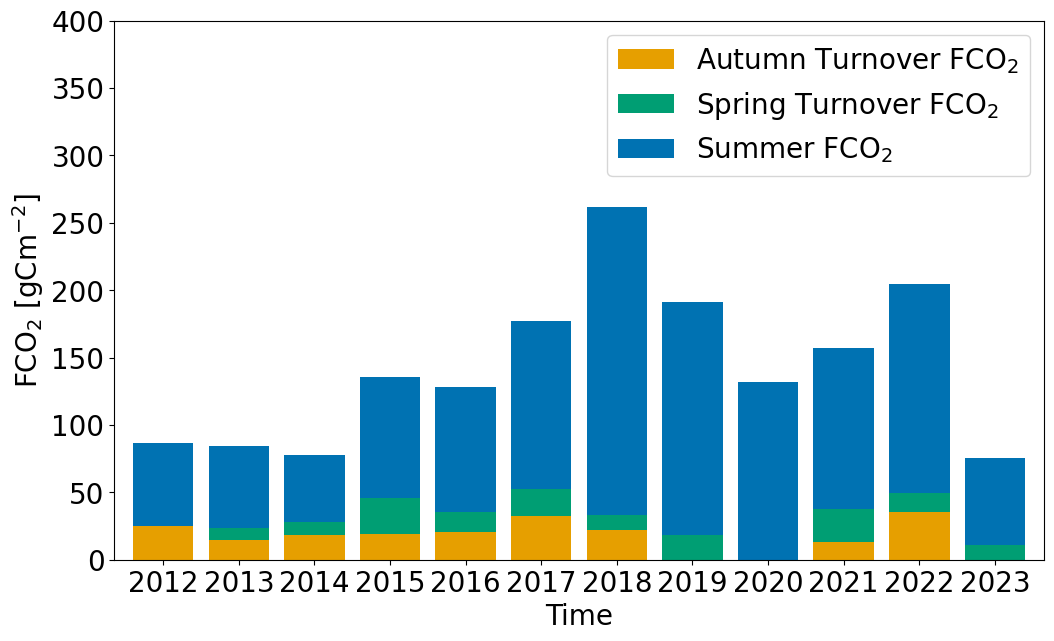

In [20]:
df_barplot_sliced = df_barplot.iloc[2:]
colors_bar = ["#e69f00","#009e73","#0072b2"]
# Create the stacked bar plot
ax = df_barplot_sliced[['Autumn FCO2', 'Spring FCO2', 'Total FCO2']].plot(kind='bar', stacked=True, color=colors_bar, figsize=(12, 7),width=0.8)
# plt.axhline(column_mean['Real Total FCO2'], color='red', linestyle='--', linewidth=2)

# Set labels and title
plt.xlabel('Time', fontsize=20)
plt.ylabel('F$\mathrm{CO_2}$ [gC$\mathrm{m^{-2}}$]', fontsize=20)
plt.ylim([0, 400]) 
# plt.title('Contribution of spring and autumn turnovers to the annual emission of F$\mathrm{CO_2}$', fontsize=20)
plt.xticks(range(len(df_barplot_sliced)), annual_autumn_FCO2.index[2:], rotation=0, fontsize=20)  # Set x-tick labels
# ax.set_xticklabels(x_ticks, rotation=0, fontsize=8)
plt.tick_params (rotation=0, labelsize=20)
plt.legend(['Autumn Turnover F$\mathrm{CO_2}$','Spring Turnover F$\mathrm{CO_2}$', 'Summer F$\mathrm{CO_2}$'],fontsize=20)
# plt.legend(['Mean annual F$\mathrm{CO_2}$','Autumn Turnover F$\mathrm{CO_2}$','Spring Turnover F$\mathrm{CO_2}$', 'Summer F$\mathrm{CO_2}$'],fontsize=20)
plt.savefig('FCO2_contribution_plot_IM.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
# save to .csv
df_barplot.to_csv('FCO2_cumulative_IM.csv', sep=',')

SCATTER LENGTH vs FCO2

In [22]:
# read datatframe
autumn_length = pd.read_csv('Length_autumn.csv',sep=';')
spring_length = pd.read_csv('Length_spring.csv',sep=';')
# create dataframe from file
df_length = pd.DataFrame(autumn_length)
df_spring_length = pd.DataFrame(spring_length)

df_length['spring'] = df_spring_length['Length']

In [23]:
df_per = df_per.rename(columns={0: "autumn"})

In [24]:
#*
df_length_sliced_a = df_length.drop(index=[7,11])
df_barplot_sliced_a = df_barplot.drop(index=[7,11])

mask = ~np.isnan(df_length_sliced_a['autumn']) & ~np.isnan(df_barplot_sliced_a['Autumn FCO2'])
x_clean_a = df_length_sliced_a['autumn'][mask]
y_clean_a = df_barplot_sliced_a['Autumn FCO2'][mask]

slope_a, intercept_a, r_value_a, p_value_a, std_err_a = stats.linregress(x_clean_a,y_clean_a)
r_squared_a = r_value_a**2
print(r_squared_a)
print(p_value_a)
print(slope_a)

0.06381406608368942
0.5846997611771552
-0.26849252710975546


In [25]:
df_length_sliced = df_length.drop(index=[4,7])
df_barplot_sliced = df_barplot.drop(index=[4,7])

mask = ~np.isnan(df_length_sliced['spring']) & ~np.isnan(df_barplot_sliced['Spring FCO2'])
x_clean_s = df_length_sliced['spring'][mask]
y_clean_s = df_barplot_sliced['Spring FCO2'][mask]

slope_s, intercept_s, r_value_s, p_value_s, std_err_s = stats.linregress(x_clean_s,y_clean_s)
r_squared_s = r_value_s**2
print(r_squared_s)
print(p_value_s)
print(slope_s)

0.6209513893360865
0.02019221306099495
0.82069493923177


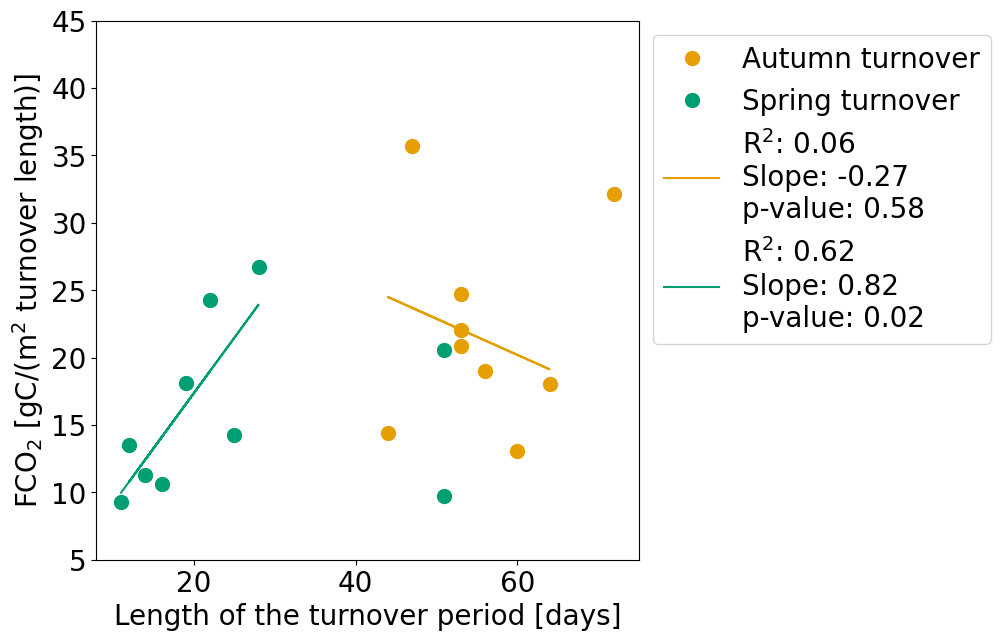

In [26]:
# plot timeseries
fig = plt.subplots(figsize=(7,7))
plt.plot(df_length['autumn'],df_barplot['Autumn FCO2'],'.',color="#e69f00",markersize=20)
plt.plot(df_length['spring'],df_barplot['Spring FCO2'],'.',color="#009e73",markersize=20)
plt.ylim([5,45]) 

plt.plot(x_clean_a, intercept_a + slope_a * x_clean_a, color="#e69f00", label='Correlation Line Autumn')
plt.plot(x_clean_s, intercept_s + slope_s * x_clean_s, color="#009e73", label='Correlation Line Spring')

plt.tick_params (rotation=0, labelsize=20)
plt.legend([
    'Autumn turnover',
    'Spring turnover',
    f'$\mathrm{{R^2}}$: {r_squared_a:.2f} \nSlope: {slope_a:.2f} \np-value: {p_value_a:.2f}',
    f'$\mathrm{{R^2}}$: {r_squared_s:.2f} \nSlope: {slope_s:.2f} \np-value: {p_value_s:.2f}'
], fontsize=20, loc="upper left", bbox_to_anchor=(1, 1))# plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Length of the turnover period [days]', fontsize=20)
plt.ylabel('F$\mathrm{CO_2}$ [gC/($\mathrm{m^{2}}$ turnover length)]', fontsize=20)
# plt.title('Length of turnover period vs cumulative F$\mathrm{CO_2}$', fontsize=20)
plt.savefig('Lenght_vs_FCO2_turnover_IM.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [27]:
print(df_length['autumn'],df_barplot['Autumn FCO2'])

0      NaN
1      NaN
2     53.0
3     44.0
4     64.0
5     56.0
6     53.0
7     72.0
8     53.0
9      NaN
10     NaN
11    60.0
12    47.0
13     NaN
Name: autumn, dtype: float64 0           NaN
1           NaN
2     24.705954
3     14.413574
4     18.054618
5     19.020082
6     20.853866
7     32.126371
8     22.075452
9           NaN
10          NaN
11    13.039619
12    35.723189
13          NaN
Name: Autumn FCO2, dtype: float64


READ GAPFILL FLAGS

In [28]:
# read datatframe
gaps_flags = pd.read_csv('FlagGapFilled_da.csv',sep=';')
df_gaps_flags = pd.DataFrame(gaps_flags)
df_gaps_flags['Time'] = pd.to_datetime(df_gaps_flags['Time'])
print(df_gaps_flags)

           Time  FCO2  pCO2  atm CO2  U10  Tw 20 cm  Atm Press
0    2010-01-01     0     0        0    0         0          0
1    2010-01-02     0     0        0    0         0          0
2    2010-01-03     0     0        0    0         0          0
3    2010-01-04     0     0        0    0         0          0
4    2010-01-05     0     0        0    0         0          0
...         ...   ...   ...      ...  ...       ...        ...
5108 2023-12-27     0     0        0    0         0          0
5109 2023-12-28     0     0        0    0         0          0
5110 2023-12-29     0     0        0    0         0          0
5111 2023-12-30     0     0        0    0         0          0
5112 2023-12-31     0     0        0    0         0          0

[5113 rows x 7 columns]
